In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)

0.24.1


In [2]:
df_train = pd.read_csv("Titanic_train.csv")
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


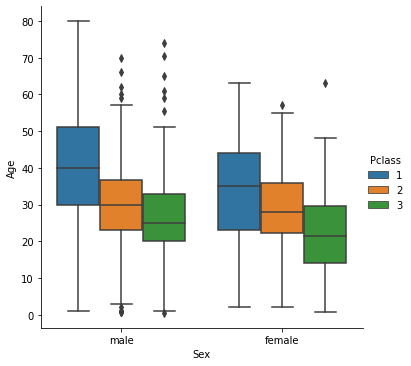

In [3]:
g = sns.catplot(x="Sex", y="Age", hue="Pclass",
               data=df_train, kind="box")

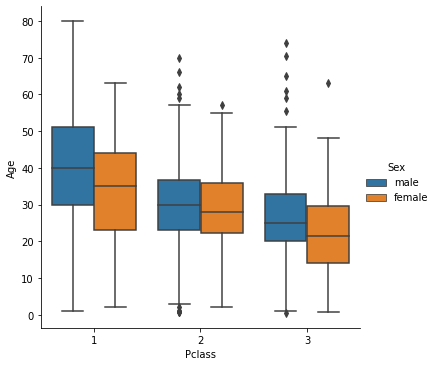

In [4]:
# step1：觀察 Age 和 Pclass 和 Sex 是否有關連性?
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train, kind="box")
# PClass 2,3有outliers異常值
# 每一組pclass 的男性平均年齡都大於女性平均

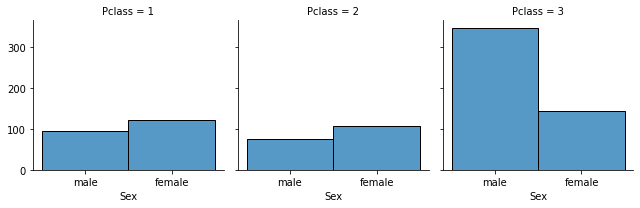

In [5]:
# sns.catplot(data=df_train["Pclass"], kind="box")
g = sns.FacetGrid(df_train, col='Pclass')
g.map(sns.histplot, 'Sex', kde=False)
# Pclass 與 Sex 沒什麼正負相關

In [6]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
data = df_train[['Age', 'Pclass', 'Sex']]
display(data[data.isnull().values==True].head())
missing = data.isnull()
print(missing.sum())

,Age,Pclass,Sex
5,NaN,3,1
17,NaN,2,1
19,NaN,3,0
26,NaN,3,1
28,NaN,3,0


Age       177
Pclass      0
Sex         0
dtype: int64


In [7]:
value_neighbors = 1
imputer = KNNImputer(n_neighbors=value_neighbors, weights='uniform', add_indicator=False)
data_filled = pd.DataFrame(imputer.fit_transform(data), columns=['Age', 'Sex', 'Pclass'])
display(data_filled)

,Age,Sex,Pclass
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
886,27.0,2.0,1.0
887,19.0,1.0,0.0
888,26.0,3.0,0.0
889,26.0,1.0,1.0


In [8]:
data_filled['Age'].isnull().sum()

0